In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

**1. Известно, что генеральная совокупность распределена нормально со средним квадратическим отклонением, равным 16. Найти доверительный интервал для оценки математического ожидания a с надежностью 0.95, если выборочная средняя M = 80, а объем выборки n = 256.**

По условию задачи:

$\sigma = 16$

$\alpha = 1 - 0.95 = 0.05$

$\mu = 80$

$n = 256$

Так как $\sigma$ известна, воспользуемся критерием $Z$.

$Z_{\frac{\alpha}{2}} = Z_{\frac{0.05}{2}} = Z_{0.025} = 1.96$

Доверительные интервалы найдем по формуле:

$T_{1,2} = \overline{X} \pm Z_{\frac{\alpha}{2}}*\frac{\sigma}{\sqrt{n}}$

Подставим значения:

$T_{1,2} = 80 \pm 1.96*\frac{16}{\sqrt{256}}$

$T_{1} = 78.04$

$T_{2} = 81.96$

${\color {red}{Ответ:\,[78.04,\,81.96]}}$

In [ ]:
# Значение площади из Z-таблицы
print(f'Площадь: {norm.cdf(1.96)}')

# Значение сигмы из Z-таблицы
print(f'Сигма: {norm.ppf(0.975)}')

Площадь: 0.9750021048517795
Сигма: 1.959963984540054


In [ ]:
sigma = 16
alpha = 0.05
n = 256
mu = 80

T_1 = mu + norm.ppf(1 - alpha/2)*(sigma/np.sqrt(n))
T_2 = mu - norm.ppf(1 - alpha/2)*(sigma/np.sqrt(n))

print(f'[{T_2:.2f}, {T_1:.2f}]')

[78.04, 81.96]


**2. В результате 10 независимых измерений некоторой величины X, выполненных с одинаковой точностью, получены опытные данные: 6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1 Предполагая, что результаты измерений подчинены нормальному закону распределения вероятностей, оценить истинное значение величины X при помощи доверительного интервала, покрывающего это значение с доверительной вероятностью 0,95.**

По условию задачи:

$X_{exp} = [6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1]$

$\alpha = 1 - 0.95 = 0.05$

$n = 10$

Так как $\sigma$ неизвестна, воспользуемся $t$-критерием Стьюдента.

Найдем $t$ для построения $95$%-го доверительного интервала, $n=10$.

$t_{\frac{\alpha}{2}} = t_{\frac{0.05}{2}} = t_{0.025} = 2.262$

Посчитаем среднее арифметическое значение наблюдаемых испытаний:

$\mu = \frac{6.9 + 6.1 + 6.2 + 6.8 + 7.5 + 6.3 + 6.4 + 6.9 + 6.7 + 6.1}{10} = 6.59$

Посчитаем несмещенную дисперсию:

$D = \frac{(6.9-6.59)^2 + (6.1-6.59)^2 + (6.2-6.59)^2 + (6.8-6.59)^2 + (7.5-6.59)^2 + (6.3-6.59)^2 + (6.4-6.59)^2 + (6.9-6.59)^2 + (6.7-6.59)^2 + (6.1-6.59)^2}{10-1} = \frac{0.0961 + 0.2401 + 0.1521 + 0.0441 + 0.8281 + 0.0841 + 0.0361 + 0.0961 + 0.0121 + 0.2401}{9} = \frac{1.829}{9} = 0.203$

Найдем среднее квадратичное отклонение:

$\sigma = \sqrt{D} = \sqrt{0.203} = 0.45$

Доверительные интервалы найдем по формуле:

$T_{1,2} = \overline{X} \pm t_{\frac{\alpha}{2}}*\frac{\sigma}{\sqrt{n}}$

Подставим значения:

$T_{1,2} = 6.59 \pm 2.262*\frac{0.45}{\sqrt{10}}$

$T_{1} = 6.27$

$T_{2} = 6.91$

${\color {red}{Ответ:\,[6.27,\,6.91]}}$

In [ ]:
x_exp = [6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1]
alpha = 0.05
n = 10

# Расчет t-критерия Стьюдента
def t(alpha, n):
  v = n - 1
  a = 1 - (alpha/2)
  return scipy.stats.t.ppf(a, v)

mu = np.mean(x_exp)
D = np.var(x_exp, ddof=1)
sigma = np.sqrt(D)
T_1 = mu + t(alpha, n)*(sigma/np.sqrt(n))
T_2 = mu - t(alpha, n)*(sigma/np.sqrt(n))

print(f'[{T_2:.2f}, {T_1:.2f}]')

[6.27, 6.91]


**3. Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя односторонний критерий с α=0,05, проверить эту гипотезу, если в выборке из n=100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 кв. мм.**

По условию задачи:

$\alpha = 0.05$

$n = 100$

$D = 4$

Запишем нулевую и альтернативную гипотезы: 

Н0: диаметр $= 17$ мм, $\mu = \mu_0$ 

Н1: диаметр $= 17.5$ мм, $\mu > \mu_0$

Предположим, что распределение является нормальным. Так как нам известна средняя квадратичная ошибка, для статистической проверки нулевой гипотезы используем $Z$-критерий.

Чтобы найти $Z$-расчетное воспользуемся формулой:

$Z_н = \frac{\overline{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$

Подставим значения:

$Z_н = \frac{17.5 - 17}{\frac{\sqrt{4}}{\sqrt{100}}} = \frac{0.5}{\frac{1}{5}} = 2.5$

Найдем $Z$-табличное при $\alpha = 0.05$:

$Z = 1.645$

Так как $Z$-расчетное намного больше $Z$-табличного, отвергаем нулевую гипотезу H0 и принимаем альтернативную H1, что диаметр подшипников больше, чем $17$ мм.

${\color {red}{Ответ:\,принимаем\, гипотезу\,Н1.}}$

In [ ]:
# Значение сигмы из Z-таблицы
print(f'Сигма: {norm.ppf(0.95)}')

Сигма: 1.6448536269514722


In [ ]:
color_sq_a

array([20.29, 21.29, 22.29])

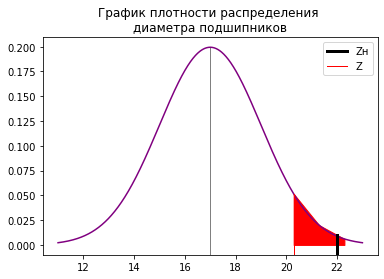

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

n = 100
mu = 17
mu_1 = 17.5
variance = 4
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
Z_n = round((mu_1 - mu)/(sigma/math.sqrt(n)), 3)
Z = round(norm.ppf(0.95), 3)
color_sq_a = np.arange(mu + Z*sigma, mu + 3*sigma)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='purple')
plt.axvline(mu, ymax=0.95, linewidth=1.0, color='gray')
plt.axvline(mu + Z_n*sigma, ymax=0.09, color='black', linewidth=3.0, label='Zн')
plt.axvline(mu + Z*sigma, ymax=0.28, color='red', linewidth=1.0, label='Z')
plt.fill_between(color_sq_a, stats.norm.pdf(color_sq_a, mu, sigma), color='red')
plt.title('График плотности распределения \nдиаметра подшипников')
plt.legend(loc='upper right', fontsize='medium')

plt.show()

**4. Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет: 202, 203, 199, 197, 195, 201, 200, 204, 194, 190. Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%?**

По условию задачи:

$\mu_0 = 200$

$X_{exp} = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]$

$\alpha = 1 - 0.99 = 0.01$

$n = 10$

Посчитаем среднее арифметическое значение веса пачек:

$\mu = \frac{202 + 203 + 199 + 197 + 195 + 201 + 200 + 204 + 194 + 190}{10} = 198.5$

Запишем нулевую и альтернативную гипотезы: 

Н0: диаметр $= 200$ мм, $\mu = \mu_0$ 

Н1: диаметр $= 198.5$ мм, $\mu \neq \mu_0$

Посчитаем несмещенную дисперсию:

$D = \frac{(198.5-202)^2 + (198.5-203)^2 + (198.5-199)^2 + (198.5-197)^2 + (198.5-195)^2 + (198.5-201)^2 + (198.5-200)^2 + (198.5-204)^2 + (198.5-194)^2 + (198.5-190)^2}{10-1} = \frac{12.25 + 20.25 + 0.25 + 2.25 + 12.25 + 6.25 + 2.25 + 30.25 + 20.25 + 72.25}{9} = \frac{178.5}{9} = 19.83$

Найдем среднее квадратичное отклонение:

$\sigma = \sqrt{D} = \sqrt{19.83} = 4.45$

Чтобы найти $T$-расчетное воспользуемся формулой:

$T_н = \frac{\overline{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$

Подставим значения:

$T_н = \frac{198.5 - 200}{\frac{4.45}{\sqrt{10}}} = \frac{-1.5*3.16}{4.45} = -1.065$

Найдем $T$-табличное при $\alpha = 0.01$, при том, что тест двусторонний:

$T_1 = -3.25$

$T_2 = 3.25$

Так как $T$-расчетное лежит между значениями $T$-табличного, то мы нулевую гипотезу H0 принимаем и считаем, что диаметр средний вес пачки печенья $200$ г.

${\color {red}{Ответ:\,принимаем\, гипотезу\,Н0.}}$

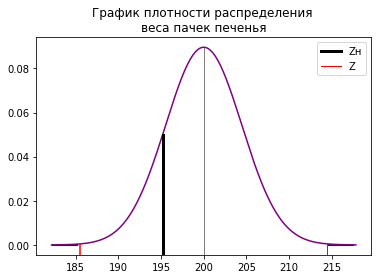

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

x_exp = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]
alpha = 0.01
n = 10
mu = 200

# Расчет t-критерия Стьюдента
def t(alpha, n):
  v = n - 1
  a = 1 - (alpha/2)
  return scipy.stats.t.ppf(a, v)

mu_1 = np.mean(x_exp)
D = np.var(x_exp, ddof=1)
sigma = np.sqrt(D)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
T_n = round((mu_1 - mu)/(sigma/math.sqrt(n)), 3)
T = round(t(alpha, n), 3)
color_sq_m = np.arange(mu - 4*sigma, mu - T*sigma)
color_sq_p = np.arange(mu + T*sigma, mu + 4*sigma)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='purple')
plt.axvline(mu, ymax=0.95, linewidth=1.0, color='gray')
plt.axvline(mu + T_n*sigma, ymax=0.55, color='black', linewidth=3.0, label='Zн')
plt.axvline(mu + T*sigma, ymax=0.05, color='red', linewidth=1.0, label='Z')
plt.axvline(mu - T*sigma, ymax=0.05, color='red')
plt.fill_between(color_sq_m, stats.norm.pdf(color_sq_m, mu, sigma), color='blue')
plt.fill_between(color_sq_p, stats.norm.pdf(color_sq_p, mu, sigma), color='blue')
plt.title('График плотности распределения \nвеса пачек печенья')
plt.legend(loc='upper right', fontsize='medium')

plt.show()